# Spoken Dialogue System Lab: A Voice-enabled RASA Assistant
The following lab describes the creation of a Dialogue System with RASA and how to connect it to Alexa, based on this [blog post](https://blog.rasa.com/connect-your-rasa-ai-assistant-to-amazon-alexa/).

Leveraging RASA and Alexa we can create a full dialogue system that includes all the main components:
- Automatic Speech Recognition (ASR), using Alexa
- Natural Language Understanding (NLU), leveraging RASA
- Dialogue Management (DM), leveraging RASA
- Natural Language Generation (NLG), leveraging RASA
- Text-to-Speech (TTS), using Alexa

In other words, Speech part is managed by Alexa and through RASA we build our NLU and DM.
RASA can be connected to several different services, so building and maintaining only one assistant you can provide a consistent user experience across multiple channels.

# Alexa Introduction 
Amazon Alexa, also known as Alexa is a virtual assistant developed by Amazon. It is developed as Cloud-based Voice Service and it's tightly integrated with the Amazon Ecosystem. Alexa provides information about weather forecasts, news, traffic, and allows to listen to music. At the same time, Alexa can be extended with new capabilities, called skills. Skills make Alexa smarter, tasks faster and improve overall the user experience.
To enable developers to extend with new features, Amazon created the Alexa Skill Kit (ASK). ASK allows to connect a dialogue system that deals with a specific task to Alexa.
## Alexa Skill Kit

![Alexa Skill Architecture](img/ask_architecture.png)

The architecture above ([source](https://medium.com/@abraham.kang/understanding-the-differences-between-alexa-api-ai-wit-ai-and-luis-cortana-2404ece0977c)) describes the architecture of a generic Alexa Skill. As visible in the image, ASK provides off-the-shelf ASR and TTS, whereas NLU, DM and NLG can be customized.
That is, when we develop an Alexa Skill, NLU can be customized according to our task, DM and NLG are exposed through a Web Service or an AWS Lambda Function that is hooked to the Alexa Service.

Despite the ASK provides tools and clients to customize the NLU component, in this lab we use an hack/trick to get around it.
The main reason is that using ASK NLU would require to learn more about the ASK framework and related commands, instead we want to leverage RASA as much as possible.
So in this lab we leverage RASA as much as possible to build the Dialogue System and we use ASK only to deploy and
give to our system Alexa ASR and TTS.

## Lab Structure
In this lab we first create an example app and then we connect the app to Alexa based on the following  [repository](https://github.com/RasaHQ/tutorial-rasa-alexa) and this [blog post](https://blog.rasa.com/connect-your-rasa-ai-assistant-to-amazon-alexa/).

To create an Alexa Skill with RASA, we need the following: 
- A RASA assistant
- An Alexa Skill
- A custom connector that connects the two pieces. 

In the following video you can see an example interaction with your system. This is the idea of what we want to achieve.

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('cpm2Z--EkYM')

## RASA Assistant
This is an example bot available off-the-shelf in the RASA repository and extended with the Alexa Connector [Pizza Assistant](https://github.com/giTorto/HMD-PizzaBot) ( or [Restaurant Assistant](https://github.com/giTorto/rasa-restaurantbot)). In the repository you can find a README.md that describes how to run it locally and an install.sh file that contains all the requirements.

RASA Assistant CheckList:
- Python 3.9 or 3.8
- [Git](https://www.atlassian.com/git/tutorials/install-git), otherwise download the repository [here](https://github.com/giTorto/HMD-PizzaBot/archive/master.zip)
- Optional: Virtual Environment, to keep your project modular and your dependencies separate

To train your RASA assistant, you can just run the command `rasa train` to train your dialogue system.
To test your Dialogue System in the command line, use `rasa shell`.

After that you created and tested your bot, you just need to run it in server mode. In the repository you can find the Alexa Connector, this is the piece of code that makes the RASA assistant and Alexa communicate.

There is no need of understanding how it works, but basically it's a HTTP REST Endpoint that performs 2 main tasks:
- Response: wraps the bot prompt in the format that Alexa expects
- Request: converts the format of incoming request from the Alexa Skill for our RASA Assistant.

So download the [Pizza Assistant](https://github.com/giTorto/HMD-PizzaBot) ( or [Restaurant Assistant](https://github.com/giTorto/rasa-restaurantbot) ) and move to that folder.

To verify that your system currently instanced the app and the channel you can send the following curl request:

In [1]:
import requests

url = "http://localhost:5005/webhooks/alexa_assistant/webhook"

payload = "{\n        \"version\": \"1.0\",\n        \"session\": {\n            \"new\": true,\n            \"sessionId\": \"amzn1.echo-api.session.672c5a33-4e36-4d35-a3c2-0ff335fcbeb5\",\n            \"application\": {\n                \"applicationId\": \"amzn1.ask.skill.4ad05aa0-5950-477f-9875-8b321fa03680\"\n            },\n            \"attributes\": {},\n            \"user\": {\n                \"userId\": \"amzn1.ask.account.AEHQBJZWCEQTAU26RS4JHJS5YIRDEXNELWVT7GFH3R4M5PM6SCTHQW2O5GPY4QJVYRAL6DC6ID3MVMBAPLMVOB4P2XLDPFWEJGKIZNI766YPVYEM7NY5EQICLHGSH32JISZ4ZV4FMIWZZDSUC6O3RTGZRBQZZ7XA43ZLMCTTXASRIZ6HYPP6HN4DDUGSW2R3EQCHPXD7SAPG3DA\"\n            }\n        },\n        \"context\": {\n\t\t\"Viewports\": [\n\t\t\t{\n\t\t\t\t\"type\": \"APL\",\n\t\t\t\t\"id\": \"main\",\n\t\t\t\t\"shape\": \"RECTANGLE\",\n\t\t\t\t\"dpi\": 213,\n\t\t\t\t\"presentationType\": \"STANDARD\",\n\t\t\t\t\"canRotate\": false,\n\t\t\t\t\"configuration\": {\n\t\t\t\t\t\"current\": {\n\t\t\t\t\t\t\"mode\": \"HUB\",\n\t\t\t\t\t\t\"video\": {\n\t\t\t\t\t\t\t\"codecs\": [\n\t\t\t\t\t\t\t\t\"H_264_42\",\n\t\t\t\t\t\t\t\t\"H_264_41\"\n\t\t\t\t\t\t\t]\n\t\t\t\t\t\t},\n\t\t\t\t\t\t\"size\": {\n\t\t\t\t\t\t\t\"type\": \"DISCRETE\",\n\t\t\t\t\t\t\t\"pixelWidth\": 1280,\n\t\t\t\t\t\t\t\"pixelHeight\": 800\n\t\t\t\t\t\t}\n\t\t\t\t\t}\n\t\t\t\t}\n\t\t\t}\n\t\t],\n\t\t\"Viewport\": {\n\t\t\t\"experiences\": [\n\t\t\t\t{\n\t\t\t\t\t\"arcMinuteWidth\": 346,\n\t\t\t\t\t\"arcMinuteHeight\": 216,\n\t\t\t\t\t\"canRotate\": false,\n\t\t\t\t\t\"canResize\": false\n\t\t\t\t}\n\t\t\t],\n\t\t\t\"mode\": \"HUB\",\n\t\t\t\"shape\": \"RECTANGLE\",\n\t\t\t\"pixelWidth\": 1280,\n\t\t\t\"pixelHeight\": 800,\n\t\t\t\"dpi\": 213,\n\t\t\t\"currentPixelWidth\": 1280,\n\t\t\t\"currentPixelHeight\": 800,\n\t\t\t\"touch\": [\n\t\t\t\t\"SINGLE\"\n\t\t\t],\n\t\t\t\"video\": {\n\t\t\t\t\"codecs\": [\n\t\t\t\t\t\"H_264_42\",\n\t\t\t\t\t\"H_264_41\"\n\t\t\t\t]\n\t\t\t}\n\t\t},\n\t\t\"Extensions\": {\n\t\t\t\"available\": {\n\t\t\t\t\"aplext:backstack:10\": {}\n\t\t\t}\n\t\t},\n\t\t\"System\": {\n\t\t\t\"application\": {\n\t\t\t\t\"applicationId\": \"amzn1.ask.skill.4ad05aa0-5950-477f-9875-8b321fa03680\"\n\t\t\t},\n\t\t\t\"user\": {\n\t\t\t\t\"userId\": \"amzn1.ask.account.AEHQBJZWCEQTAU26RS4JHJS5YIRDEXNELWVT7GFH3R4M5PM6SCTHQW2O5GPY4QJVYRAL6DC6ID3MVMBAPLMVOB4P2XLDPFWEJGKIZNI766YPVYEM7NY5EQICLHGSH32JISZ4ZV4FMIWZZDSUC6O3RTGZRBQZZ7XA43ZLMCTTXASRIZ6HYPP6HN4DDUGSW2R3EQCHPXD7SAPG3DA\"\n\t\t\t},\n\t\t\t\"device\": {\n\t\t\t\t\"deviceId\": \"amzn1.ask.device.AH2CNVJCWFKIPZEJDILA6532TW2FUSVIRXG6CLW6TKVWBI5LPFRLFKX4Q62NBMZPM7JQ7TI4LSLJZDHIXDPG3EFDZ6SRPFN5V3ZHGHPDWFUKEY7GIZNGFIR2JJRQSBHTSGCYS65IELW5HMI27WWHGCX7WUB7LALZPFSF3AHJBZUCCMJOCZNHK\",\n\t\t\t\t\"supportedInterfaces\": {}\n\t\t\t},\n\t\t\t\"apiEndpoint\": \"https://api.eu.amazonalexa.com\",\n\t\t\t\"apiAccessToken\": \"eyJ0eXAiOiJKV1QiLCJhbGciOiJSUzI1NiIsImtpZCI6IjEifQ.eyJhdWQiOiJodHRwczovL2FwaS5ldS5hbWF6b25hbGV4YS5jb20iLCJpc3MiOiJBbGV4YVNraWxsS2l0Iiwic3ViIjoiYW16bjEuYXNrLnNraWxsLjRhZDA1YWEwLTU5NTAtNDc3Zi05ODc1LThiMzIxZmEwMzY4MCIsImV4cCI6MTY3MDE4OTI3MywiaWF0IjoxNjcwMTg4OTczLCJuYmYiOjE2NzAxODg5NzMsInByaXZhdGVDbGFpbXMiOnsiY29udGV4dCI6IkFBQUFBQUFBQVFCRHJyOFp0WlhJZ2Nid2JRUzhVYkdVS2dFQUFBQUFBQUJvUHN6REphRENxbnN5M1g5R01aRXFKRWVGWTZST2duNlQ5QWpGbk5lQ1crNWtNRmR0L1grdG10eFN4aTR6VVhBRm8yU2Zab0tqYzZiQVJycTd3aEN2Rnp2L3FoTHcwbjAyWU50NmxqOFIydkFvREw2VlNHUW9OU1VVM1NXNDdVSS8rMGZOSkxnanZoci9GYTJxTWJHYSt3STdPaHljbFh6eHQvcFErNDduTjMwNkJkeTFtWEpNT1FVaFI0aU43SXlRUTdsdE10cTZ2UGhRQk9hK0FRMC9ZZVJ2N1crVUVNTGlRb0JVdmRDc2E5Q3R5WklQbUczMng2YlJ5QXgzTlZTOHUxNlRSRXZ6UTQxUFJJdldoeFBDT2JxbnZyTnBzck4rSFIzZnRwOE5JU1lnNmVsVW1MOFNyWURHeTliQ1JlU1d1L2MyRHB4YThNU3kwQVBGdDlONFNZYTBBNDM5eTZtZmo5YUc5Q2RzbzdpQm1jWmRWcm1GRzNtNFpTOTZ0UFNlN1pzR0NqSlhrYlI1IiwiZGV2aWNlSWQiOiJhbXpuMS5hc2suZGV2aWNlLkFIMkNOVkpDV0ZLSVBaRUpESUxBNjUzMlRXMkZVU1ZJUlhHNkNMVzZUS1ZXQkk1TFBGUkxGS1g0UTYyTkJNWlBNN0pRN1RJNExTTEpaREhJWERQRzNFRkRaNlNSUEZONVYzWkhHSFBEV0ZVS0VZN0dJWk5HRklSMkpKUlFTQkhUU0dDWVM2NUlFTFc1SE1JMjdXV0hHQ1g3V1VCN0xBTFpQRlNGM0FISkJaVUNDTUpPQ1pOSEsiLCJ1c2VySWQiOiJhbXpuMS5hc2suYWNjb3VudC5BRUhRQkpaV0NFUVRBVTI2UlM0SkhKUzVZSVJERVhORUxXVlQ3R0ZIM1I0TTVQTTZTQ1RIUVcyTzVHUFk0UUpWWVJBTDZEQzZJRDNNVk1CQVBMTVZPQjRQMlhMRFBGV0VKR0tJWk5JNzY2WVBWWUVNN05ZNUVRSUNMSEdTSDMySklTWjRaVjRGTUlXWlpEU1VDNk8zUlRHWlJCUVpaN1hBNDNaTE1DVFRYQVNSSVo2SFlQUDZITjRERFVHU1cyUjNFUUNIUFhEN1NBUEczREEifX0.gSfPNgOCMTjeDeIUx9vj_l8GAKrBg324vljH3OIwGo61sG1nDOlz5mCtJGNxA__HiTrOE9iCcb6kZIaRvhxUiKi-_nF1mlKehNxr3iMY0hIqDfJ1eURxWJyG68Ld_MwKkNPUT6QcBQ5cyJmeVhjzRcdRiQNufrPiR6R6My8Ij4AMr1E0dC7kVVYe7U2TXuQq9dHQhUziNsDtTOd6gIgyrwbi_fc5mUwUSGDPiYBFv_zZfPmg0wPZmzsRBUSPpTqRecmTxhJl3lT8ogXuNsCHAtd7WTSWdtWM5jhsQ2D1ODIcqUjOw_E1aKbi5hCHKZ473QAiCYjP-nwSPqsY47UP1Q\"\n\t\t}\n\t},\n\t\"request\": {\n\t\t\"type\": \"LaunchRequest\",\n\t\t\"requestId\": \"amzn1.echo-api.request.d3fd24bd-6391-4a46-9c3a-d5f6da6938f9\",\n\t\t\"locale\": \"en-US\",\n\t\t\"timestamp\": \"2022-12-04T21:22:53Z\",\n\t\t\"shouldLinkResultBeReturned\": false\n\t}\n}"
headers = {
    'cache-control': "no-cache",
    'postman-token': "fa84ac11-9b5f-4951-3522-10880c31b95d"
    }

response = requests.request("POST", url, data=payload, headers=headers)

print(response.text)

ConnectionError: HTTPConnectionPool(host='localhost', port=5005): Max retries exceeded with url: /webhooks/alexa_assistant/webhook (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001FC4E8CFAC0>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

The expected response is 
```json
{"version":"1.0","sessionAttributes":{"status":"test"},"response":{"outputSpeech":{"type":"PlainText","text":"Hello! Welcome to this Rasa-powered Alexa skill. You can start by saying 'hi'.","playBehavior":"REPLACE_ENQUEUED"},"reprompt":{"outputSpeech":{"type":"PlainText","text":"Hello! Welcome to this Rasa-powered Alexa skill. You can start by saying 'hi'.","playBehavior":"REPLACE_ENQUEUED"}},"shouldEndSession":"false"}}
```

## Alexa Skill
As explained before with an Alexa Skill you extend the capability of Alexa. The Alexa Skills kit provides some basic features to train a custom NLU module, however we will use a simple trick to use our RASA NLU.

Alexa Skill CheckList:
- Alexa Developer Account: https://developer.amazon.com/it/alexa-skills-kit

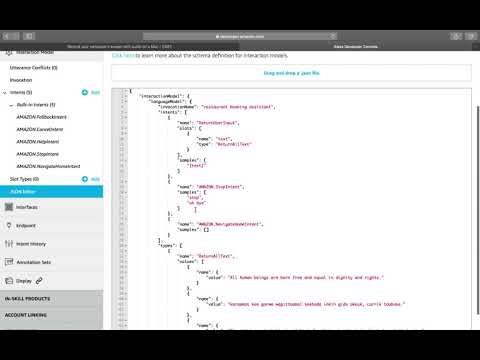

In [2]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('xeU3nbNkOn0')

Step by step guide to create a new skill:
1. On the Alexa developer console, click on the blue "Create Skill" button.
2. Choose a name for your skill ("Restaurant Booking Assistant"), and pick the default language
3. On the next page, for "Choose a model to add to your skill" select "Custom" and for "Choose a method to host your skill's backend resources" pick "Provision your own"
4. Pick "Start from scratch" when asked "Choose a template".
5. By default you have a bot with five default intents. However, we want to handle NLU with the RASA assistant,for this reason we expect to get raw text of the user. To fix this look at step 6.
6. Go to the “JSON Editor" and replace the existing JSON object with the contents of the alexa_schema.json file from the repository. Please notice that the file sets also the skill name so if you have chosen a different name, update the json file before.
7. Using the buttons at the top of the screen, "Save Model" and "Build Model"
8. In step 6 we introduced a new intent "ReturnUserInput" that should catch any utterance from the user, by clicking on the upper right hand corner "Evaluate Model" you should verify that the utterance is labelled as "ReturnUserInput" an it should contain one single slot called "text" which contains the user raw input.

## Connecting Alexa and RASA
In this section we will cover how to connect your RASA Assistant with your RASA Assistant. The main challenge in this phase is that we need to create a HTTPS public url to provide to the Alexa Skill Kit. Luckily, we are not inside the university network and we can use NGrok, otherwise the alternative is to host your RASA Assistant with Pythonanywhere.

CheckList:
- Ngrok, https://ngrok.com/download

Short video step-by-step guide:

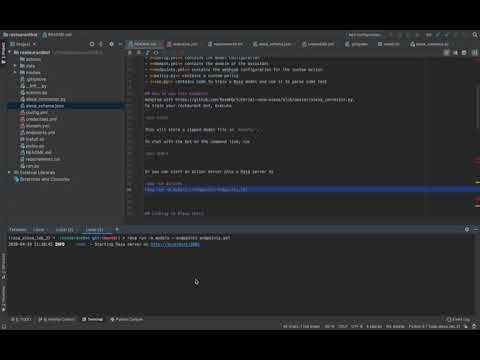

In [2]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('eU7DGNHWVEQ')

Follow these steps:
1. from the repository folder launch first `rasa run actions` 
2. in a separate shell window `rasa run -m models --endpoints endpoints.yml -p 5005 --credentials credentials.yml`
3. on another terminal tab launch ngrok `ngrok http 5005`. Launching this command will create a unique URL that will be visible on your commandline. Copy the HTTPS URL, it should look like https://123abc4d.ngrok.io
4. Go back to the Alexa Developer Console 
5. choose "Endpoint" from the "Skill Builder Checklist"
6. Select HTTPS
7. As SSL certificate, choose "My development endpoint is a subdomain of a domain that has a wildcard certificate from a certificate authority
8. Copy the ngrok url concatenated with `webhooks/alexa_assistant/webhook` that specify the suffix added by our connector
9. Make sure to save your endpoints every time you update them!

Now you can test your Voice-Enabled RASA Assistant in the developer console.🎉 (Please notice that Ngrok is blocked inside the University network)

Step by step guide to test your skill:
1. On the Alexa Devleloper Console go the the "Test" tab for your skill.
2. On the drop down menu at the top of the screen, pick "Development" for "Skill testing is enabled in:"
3. Use the provided interface to test your skill. You have to use the Invocation Name for your skill to start it, which should be "Restaurant Booking Assistant".

(P.S. This lab is heavily inspired to the following Blog post: https://blog.rasa.com/connect-your-rasa-ai-assistant-to-amazon-alexa/ )

## Voice-Enable other RASA Assistants
We developed a Voice-Enabled RASA assistant, through an Alexa Skill and a RASA Assistant. To apply this to any other repository you just need perform the following Steps:
1. Copy the [Alexa Connector](https://github.com/giTorto/rasa-restaurantbot/blob/master/alexa_connector.py) in your repository
2. Copy the [Credentials.yml](https://github.com/giTorto/rasa-restaurantbot/blob/master/credentials.yml) in your repository
3. Copy the [Alexa schema.json](https://github.com/giTorto/rasa-restaurantbot/blob/master/alexa_schema.json) in your repository and follow the same steps to create a new Alexa Skill as described before
4. Launch your assistant, the action server and ngrok as already did.